## 1. Definition of the Business Problem

This is the foundation of the project. In this stage, we translate a company’s need into a clear objective for Data Science. We define what we want to solve (for example, automating the classification of product reviews), why it is important (to reduce costs, speed up decision-making), and how success will be measured.

### Definition

An e-commerce company wants to automate the analysis of customer feedback. Currently, the analysis is done manually, which is a slow, expensive process that doesn’t scale with the increasing volume of reviews received daily.

### Objective

Build a Machine Learning model that automatically classifies product reviews as ‘positive’ or ‘negative’.

### Expected Benefits

Efficiency: Reduce the time and cost of feedback analysis.

Fast Decision-Making: Allow product and marketing teams to quickly identify products with issues or opportunities for improvement.

Prioritization: Direct negative reviews to the customer support team with higher priority, improving the overall customer experience.

## 2. Importing the Packages

In [1]:
# Install watermark package
!pip install -q -U watermark


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install -U scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
# Data manipulation and visualization
import re
import pandas as pd
import numpy as np
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [4]:
# View Configuration
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
%reload_ext watermark
%watermark -a "Eduardo Data Science"

Author: Eduardo Data Science



In [6]:
%watermark --iversions

numpy     : 1.26.4
joblib    : 1.2.0
pandas    : 2.3.1
sklearn   : 1.7.2
matplotlib: 3.8.4
re        : 2.2.1
seaborn   : 0.13.2



# Loading and Undestanding dataset

In [7]:
dataset = 'sentiment.csv'

In [8]:
# Loading and understanding data
df_dse = pd.read_csv(dataset, encoding="latin-1")

/var/folders/s6/9574y11x5lqg2282n0k17z0c0000gn/T/ipykernel_42176/3137060405.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dse = pd.read_csv(dataset, encoding="latin-1")


In [9]:
# Shape
df_dse.shape

(171380, 6)

significa que:
-171.380 linhas → cada linha é um registro.
-6 colunas → são as variáveis que descrevem cada review.

In [10]:
# First lines
df_dse.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral


ProductPrice and Rate are numeric, the rest is text

Text pattern Some reviews have short words (“Super!”, “Nice”), others long sentences — preprocessing will need to normalize this

In [11]:
# sample dataset
df_dse.sample(10)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
112746,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,59990,4,Wonderful,good,positive
139392,SAMSUNG 253 L Frost Free Double Door 3 Star Re...,24490.0,5.0,Highly recommended,best best best,positive
80464,KENT 16014 Electric Rice Cooker???????????????...,2969,2,Expected a better product,hopeless material due to heat the lead cracked...,negative
156823,realme Pad X 6 GB RAM 128 GB ROM 11 inch with ...,27999.0,4.0,Good choice,have been using it for the last 6 days till no...,positive
31349,"H&M Store MONDAY - SUNDAY (Morning, Noon, Nigh...",185,5,Mind-blowing purchase,excellent product must try,positive
116411,ZANDU Balm (25 ml) Pack Of 3 BalmÃÂÃÂ®ÃÂÃ...,216,5,Awesome,reasonable price,neutral
97833,BOLDFIT Hand Grip Band For Gym Strengthener Ha...,ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ¹199,2,Slightly disappointed,use less,negative
63934,Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...,218,5,Just wow!,awesome,positive
138994,SAMSUNG 253 L Frost Free Double Door 3 Star Re...,24490.0,4.0,Wonderful,reliable and good quality product one of the m...,positive
120260,Pigeon Favourite 15024 500 W Juicer Mixer Grin...,2099,4,Good choice,its good but that jar is very small for two pe...,positive


### 4. Exploratory Data Analysis (EDA)

In [12]:
# Info
df_dse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductName   171380 non-null  object
 1   ProductPrice  171379 non-null  object
 2   Rate          171379 non-null  object
 3   Review        171379 non-null  object
 4   Summary       171379 non-null  object
 5   Sentiment     171379 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


-Data type: all object (i.e. text/string)

-Tipo de dados: todos os objetos (por exemplo, texto/string)

In [13]:
print("\nChecking for missing values:\n")
print(df_dse.isnull().sum())


Checking for missing values:

ProductName     0
ProductPrice    1
Rate            1
Review          1
Summary         1
Sentiment       1
dtype: int64



Distribution of Feelings:



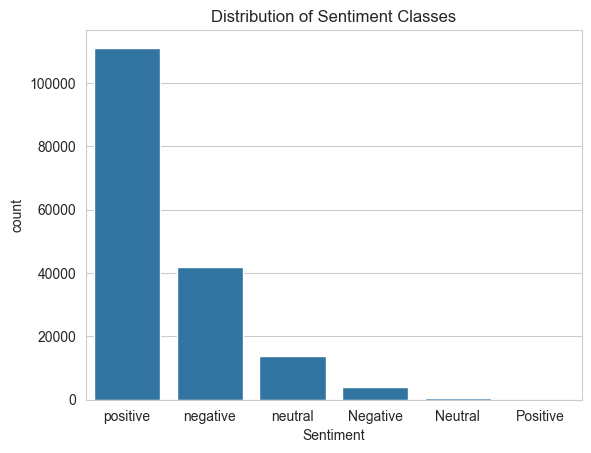

In [14]:
print("\nDistribution of Feelings:\n")
sns.countplot(x='Sentiment', data=df_dse)
plt.title('Distribution of Sentiment Classes')
plt.show()


### 5 - Data Cleaning

In [15]:
# Remover linhas com valores ausentes
print(f"\nTamanho original do DataFrame: {len(df_dse)}")
df_dse.dropna(subset=['Review'], inplace=True)
print(f"Tamanho do DataFrame após remover nulos: {len(df_dse)}")



Tamanho original do DataFrame: 171380
Tamanho do DataFrame após remover nulos: 171379


In [16]:
df_dse.shape


(171379, 6)

Normalize sentiment labels

In [17]:
# Standardize the values ​​of the 'Sentiment' column
df_dse['Sentiment'] = df_dse['Sentiment'].str.lower().str.strip()
df_dse['Sentiment'].value_counts()


Sentiment
positive    111122
negative     46119
neutral      14138
Name: count, dtype: int64

Thus, all categories are in lowercase (positive, negative, neutral).

## Convert Numeric Columns

### Currently, ProductPrice and Rate are text (object).
Convert to numeric safely:

In [18]:
df_dse['ProductPrice'] = pd.to_numeric(df_dse['ProductPrice'], errors='coerce')
df_dse['Rate'] = pd.to_numeric(df_dse['Rate'], errors='coerce')


In [19]:
df_dse.dtypes


ProductName      object
ProductPrice    float64
Rate            float64
Review           object
Summary          object
Sentiment        object
dtype: object

## Text cleaning

In [20]:

# Text cleaning function
def dse_cleaning_text(text):
    """
    Complete text cleaning function:
    1. Convert to lowercase.
    2. Remove signals and cedillas.
    3. Remove punctuation, numbers, and special characters.
    4. Remove extra spaces.
    """

    # Ensures the text is not null (if there are any NaN characters in the DataFrame)
    if not isinstance(text, str):
        return ""

    # ---- STEP 1: Normalize and remove accents ----
    # Normalize to the 'NFKD' form that separates the character from the accent mark
    # and then remove the signals (Nonspacing Mark)
    text_without_signals = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')

    # ---- STEP 2: Cleanup with Regex ----
    # Convert to lowercase
    text_clear = text_without_signals.lower()

    # Keep only letters and spaces. signals have already been removed.
    text_clear = re.sub(r'[^a-z\s]', '', text_clear)

    # Remove extra spaces
    text_clear = re.sub(r'\s+', ' ', text_clear).strip()

    return text_clear


- Apply the function to the DataFrame

In [21]:
df_dse['Clean_Review'] = df_dse['Review'].apply(dse_cleaning_text)

This defaults all text to lowercase, no accents, no numbers, no punctuation.

Check class distribution

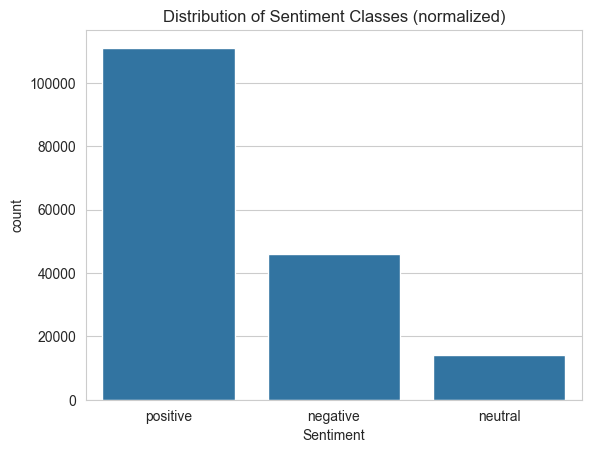

In [22]:
sns.countplot(x='Sentiment', data=df_dse)
plt.title('Distribution of Sentiment Classes (normalized)')
plt.show()


Explore text patterns

In [23]:
df_dse['text_length'] = df_dse['Clean_Review'].apply(len)
df_dse['text_length'].describe()


count    171379.000000
mean         11.220645
std           6.114572
min           0.000000
25%           8.000000
50%          10.000000
75%          15.000000
max         137.000000
Name: text_length, dtype: float64

## 6 - Feature Engineering


In [24]:
df_dse.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment,Clean_Review,text_length
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,Super!,great cooler excellent air flow and for this p...,positive,super,5
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cooling,positive,awesome,7
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,Fair,the quality is good but the power of air is de...,positive,fair,4
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,Useless product,very bad product its a only a fan,negative,useless product,15
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,Fair,ok ok product,neutral,fair,4


In [25]:

# Map sentiments to numeric values
df_dse['sentiment_label'] = df_dse['Sentiment'].map({'positive': 1,'negative': 0})

In [26]:
# Remove rows where sentiment_label is NaN (neutral cases)
df_dse = df_dse.dropna(subset=['sentiment_label'])

print(f"DataFrame size after removing neutrals: {len(df_dse)}")
df_dse['sentiment_label'].value_counts()


DataFrame size after removing neutrals: 157241


sentiment_label
1.0    111122
0.0     46119
Name: count, dtype: int64

In [27]:

print("\nDataFrame after mapping:")
df_dse[['Summary', 'sentiment_label','Sentiment']].head()



DataFrame after mapping:


,Summary,sentiment_label,Sentiment
0,great cooler excellent air flow and for this p...,1.0,positive
1,best budget 2 fit cooler nice cooling,1.0,positive
2,the quality is good but the power of air is de...,1.0,positive
3,very bad product its a only a fan,0.0,negative
5,the cooler is really fantastic and provides go...,1.0,positive


In [28]:
# Define features (X) and target (y)
X = df_dse['Summary']
y = df_dse['sentiment_label']

In [29]:
# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

## 7. Predictive Modeling Pipeline

In [30]:
# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um'])),
    ('scaler', StandardScaler(with_mean=False)),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))
])


### 7.1 Hyperparameter grid (lean and efficient)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'tfidf__max_features': [20000, 50000],      # tamanho do vocabulário
    'tfidf__ngram_range': [(1,1), (1,2)],       # uni/bi-grams
    'tfidf__min_df': [2, 5],                    # filters very rare terms
    'tfidf__max_df': [0.9, 1.0],                # filters very frequent terms
    'tfidf__use_idf': [True, False],
    'tfidf__sublinear_tf': [True],              # log-scaling in tf

    'logreg__C': [0.5, 1.0, 2.0],               # regularization
    'logreg__penalty': ['l1', 'l2'],            # with liblinear solver
    'logreg__class_weight': ['balanced']        # corrects imbalance
}


In [33]:

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs = -1,
    scoring = 'accuracy',
    verbose = 1
)

### Training Model

In [34]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'logreg__C': [0.5, 1.0, ...], 'logreg__class_weight': ['balanced'], 'logreg__penalty': ['l1', 'l2'], 'tfidf__max_df': [0.9, 1.0], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


### GridSearchCV found the best pipeline, and you can clearly see the optimized parameters.

🧠 8.5 – Model Training

In [36]:
print("\n🚀 Starting model training with hyperparameter optimization...\n")
grid_search.fit(X_train, y_train)


🚀 Starting model training with hyperparameter optimization...

Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'logreg__C': [0.5, 1.0, ...], 'logreg__class_weight': ['balanced'], 'logreg__penalty': ['l1', 'l2'], 'tfidf__max_df': [0.9, 1.0], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [37]:

print("\n✅ Best hyperparameters found:\n")
print(grid_search.best_params_)


✅ Best hyperparameters found:

{'logreg__C': 0.5, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l1', 'tfidf__max_df': 0.9, 'tfidf__max_features': 50000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': True, 'tfidf__use_idf': False}


In [39]:
# Get the best model fitted by GridSearchCV
best_model = grid_search.best_estimator_
print("\nFinal trained model:")
print(best_model)


Final trained model:
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=50000, min_df=2,
                                 ngram_range=(1, 2),
                                 stop_words=['de', 'a', 'o', 'que', 'e', 'do',
                                             'da', 'em', 'um'],
                                 sublinear_tf=True, use_idf=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('logreg',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])
